In [59]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Random Forest Regression

In [60]:
games = pd.read_csv('games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0


In [61]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 600,  # n_estimators denote number of trees
                                 max_depth = 11)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=600)

Train Data
Accuracy  :	 0.7257192033439882

TPR Train :	 0.9830927051671733
TNR Train :	 0.25365853658536586

FPR Train :	 0.7463414634146341
FNR Train :	 0.01690729483282675

Precision:	 0.8910648714810282
Recall   :	 0.25365853658536586
F1-score :	 0.39490100352590185


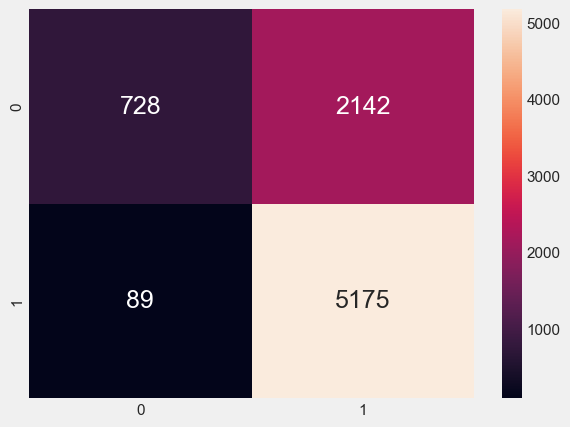

In [62]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])


Test Data
Accuracy  :	 0.6675272518646013

TPR Test :	 0.9330708661417323
TNR Test :	 0.16166666666666665

FPR Test :	 0.8383333333333334
FNR Test :	 0.06692913385826772

Precision:	 0.8910648714810282
Recall   :	 0.25365853658536586
F1-score :	 0.39490100352590185


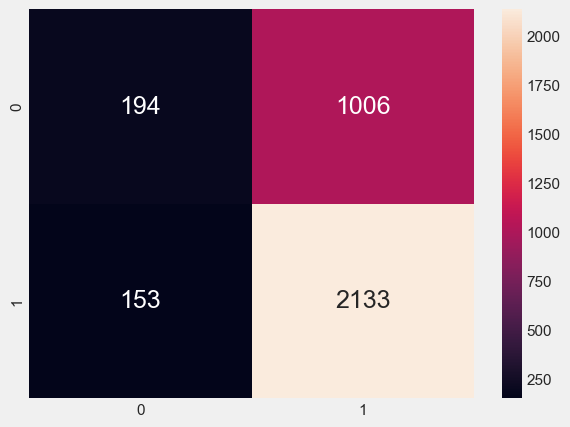

In [63]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

# Random Forest Regression - Oversampling

In [64]:
games = pd.read_csv('games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,...,Developer_PC3,Developer_PC4,Developer_PC5,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5,mature_content,status
0,19.99,14.99,25.012506,1,0,0,0,0,0,0,...,-0.006018,-0.007520,-0.005594,-0.051392,0.003178,-0.016121,-0.011612,-0.027166,False,good
1,29.99,29.99,0.000000,1,1,0,1,0,0,0,...,-0.004263,-0.005300,-0.003524,-0.045827,0.002767,-0.008356,-0.005268,-0.011944,True,bad
2,39.99,39.99,0.000000,1,1,0,0,0,0,0,...,-0.004424,-0.005508,-0.003715,-0.053120,0.003310,-0.022163,-0.016792,-0.040502,False,good
3,44.99,44.99,0.000000,1,1,0,1,0,0,0,...,-0.005299,-0.006671,-0.005675,-0.047767,0.002908,-0.010244,-0.006615,-0.015094,False,bad
4,0.00,0.00,0.000000,1,0,0,1,1,0,0,...,-0.004424,-0.005508,-0.003715,-0.046005,0.002780,-0.008505,-0.005372,-0.012186,False,good


In [65]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

KeyError: 'recommend'

Train Data
Accuracy  :	 0.7598023756964154

TPR Train :	 0.86857034795764
TNR Train :	 0.6236686390532544

FPR Train :	 0.3763313609467456
FNR Train :	 0.13142965204236007


<AxesSubplot:>

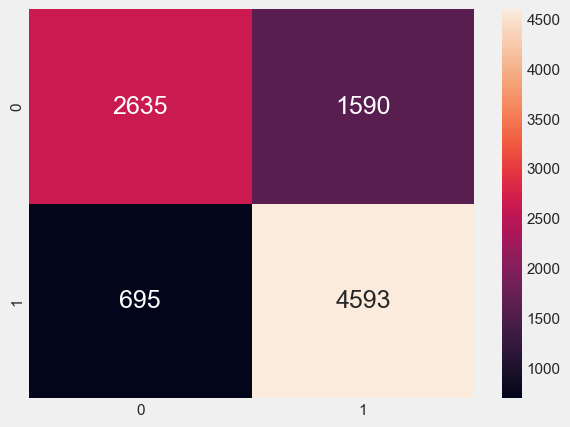

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.633308805494236

TPR Test :	 0.74447391688771
TNR Test :	 0.49476584022038567

FPR Test :	 0.5052341597796143
FNR Test :	 0.25552608311229


<AxesSubplot:>

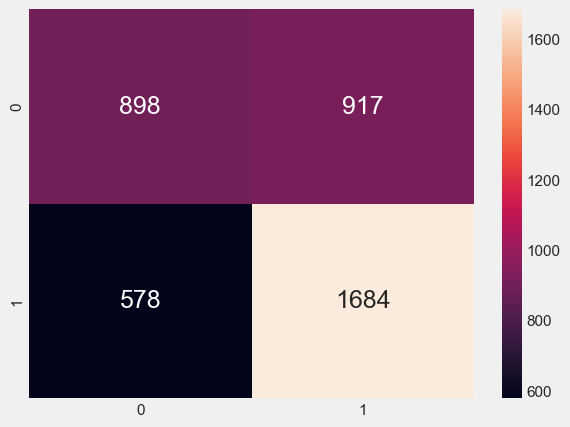

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

# Random Forest Regression - Balanced Resampling

In [ ]:
games = pd.read_csv('games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,0,0,1
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,0,0,1
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000)

Train Data
Accuracy  :	 0.7616840113528855

TPR Train :	 0.7738798856053384
TNR Train :	 0.7496713615023474

FPR Train :	 0.2503286384976526
FNR Train :	 0.2261201143946616


<AxesSubplot:>

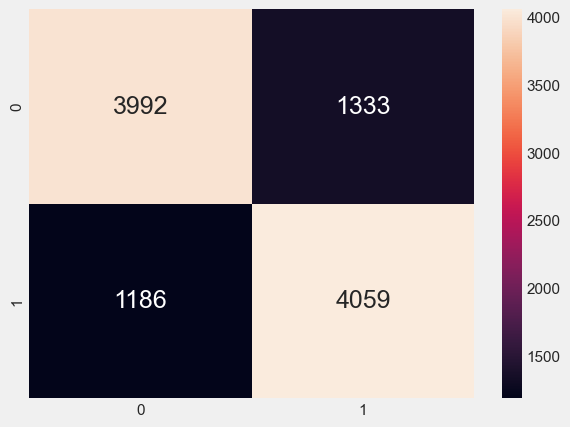

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6660044150110376

TPR Test :	 0.648590021691974
TNR Test :	 0.6840449438202247

FPR Test :	 0.31595505617977526
FNR Test :	 0.351409978308026


<AxesSubplot:>

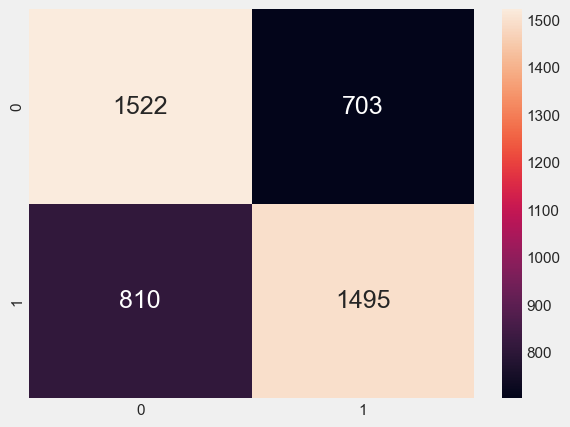

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("Recall   :\t", recall[0])
print("F1-score :\t", fscore[0])

## Cross Validation - tuning hyperparameters of Random Forest

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

games = pd.read_csv('games-prediction-resampling.csv', index_col= 0)
games.head()

# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=6)
0.6673233284268921
